In [1]:
#this code runs a randomized cross validation search of a Decision Tree Classifier and implements the  top performing model.

#start a line with '!' to write to the command line instead. 
#This allows you to install packages to the EC2 instance from within jupyter
!pip install pandas
!pip install seaborn
!pip install sklearn
!pip install numpy

#import the packages that you installed
import pandas as pd
import seaborn.apionly as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import time
import matplotlib.pyplot as plt
%matplotlib inline

#load a default seaborn dataset, display simple stats about data size, and then print the data's head
df = pd.DataFrame(sns.load_dataset('iris'))
print 'shape of the data frame'+str(df.shape)
print df.groupby(['species']).size()
df.head(50)

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

shape of the data frame(150, 5)
species
setosa        50
versicolor    50
virginica     50
dtype: int64


/usr/local/lib/python2.7/dist-packages/scipy/cluster/vq.py:78: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _vq
/usr/local/lib/python2.7/dist-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy, _optimal_leaf_ordering
/usr/local/lib/python2.7/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/usr/local/lib/python2.7/dist-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
#let's group setosa and verginica together for the sake of this machine learning exercise
df['y']= np.where(df['species']=='versicolor', 1,0)
print df.groupby(['y']).size()

y
0    100
1     50
dtype: int64


In [3]:
#split into train and test
X=df.drop('species',1).drop('y',1)
y=df['y']
RANDOM_STATE=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
print ('the number in training set: '+str(len(X_train)))
print ('the number in test set: '+str(len(X_test)))


the number in training set: 112
the number in test set: 38


In [4]:
#Randomized search for model selection
clf = tree.DecisionTreeClassifier()
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean OOB score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 4),
              "min_samples_leaf": sp_randint(1, 5),
              "criterion": ["gini", "entropy"]}


# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

random_search.fit(X_train, y_train)
#this might take a minute to run
print("RandomizedSearchCV examined %d candidate parameter settings." % (n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV examined 30 candidate parameter settings.
Model with rank: 1
Mean OOB score: 0.964 (std: 0.013)
Parameters: {'max_features': 3, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4}

Model with rank: 1
Mean OOB score: 0.964 (std: 0.025)
Parameters: {'max_features': 3, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

Model with rank: 3
Mean OOB score: 0.955 (std: 0.012)
Parameters: {'max_features': 2, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2}

Model with rank: 3
Mean OOB score: 0.955 (std: 0.033)
Parameters: {'max_features': 3, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3}

Model with rank: 3
Mean OOB score: 0.955 (std: 0.012)
Parameters: {'max_features': 2, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}

Model with rank: 3
Mean OOB score: 0.955 (std: 0.012)
Parameters: {'max_features': 3, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}



In [5]:
#2.5 Train the Decision Tree according to the best paramater setting given above. Show model outputs.

clf = tree.DecisionTreeClassifier(max_features = 3, criterion = 'gini', max_depth = 3, min_samples_leaf = 1)

clf = clf.fit(X_train, y_train)

    
y_pred=clf.predict(X_test)
y_scores=clf.predict_proba(X_test)
print ('\nconfusion matrix')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores[:,1])
print('\nauc score '+str(auc(false_positive_rate, true_positive_rate)))

#show a tradeoff curve for precision vs recall


confusion matrix
Predicted   0   1  All
True                  
0          22   0   22
1           1  15   16
All        23  15   38

auc score 0.9644886363636364


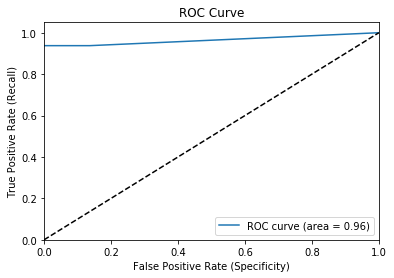

In [6]:
#2.7 ROC Curve
fpr, tpr , threshold = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
roc_auc=auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#Specificity: How many negatives were identified as negative.
plt.xlabel('False Positive Rate (Specificity)')
#Recall: How many positives were identified as positive.
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [7]:
#code to save your model to disk and then to s3
import pickle
local_path = "/home/ubuntu" # temp path to export your model
bucket_name = "homework2bucket" # s3 key to save your network to

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
#you should now see your finalized_model.sav in the file path
#the ls command prints the contents of this notebook's root folder
!ls
 
# Upload to S3
#TO GET THIS WORKING, YOU MUST ASSIGN AN ADMIN ROLE TO YOUR EC2 INSTANCE
import boto3
s3 = boto3.resource('s3')
s3.Bucket('homework2bucket').put_object(Key='DecisionTreePython.ipynb', Body=open('DecisionTreePython.ipynb'))

cft					   LICENSE
COPYING					   MTCNNandRekognition
DecisionTreePython-Copy1.ipynb		   my_local_pickle.sav
DecisionTreePython.ipynb		   NOTICE
device_failure.csv			   putty instructions for windows.docx
finalized_model.sav			   README.md
homework3.ipynb				   Rekognition_Neo4j.ipynb
intro_to_python_data_science_on_aws.ipynb  scripts
lib


s3.Object(bucket_name='homework2bucket', key='DecisionTreePython.ipynb')

In [8]:

# load the model from s3 and make new predictions
s3.Bucket(bucket_name).download_file(filename, 'finalized_model.sav')
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9736842105263158


In [9]:

s3.Bucket(bucket_name).put_object(Key='DecisionTreePython.ipynb',Body=open('DecisionTreePython.ipynb'))



s3.Object(bucket_name='homework2bucket', key='DecisionTreePython.ipynb')